Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Group 1 mean, Group 2 mean, alpha_group1, alpha_group2, Group 1 SD, Group 2 SD]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 94 seconds.


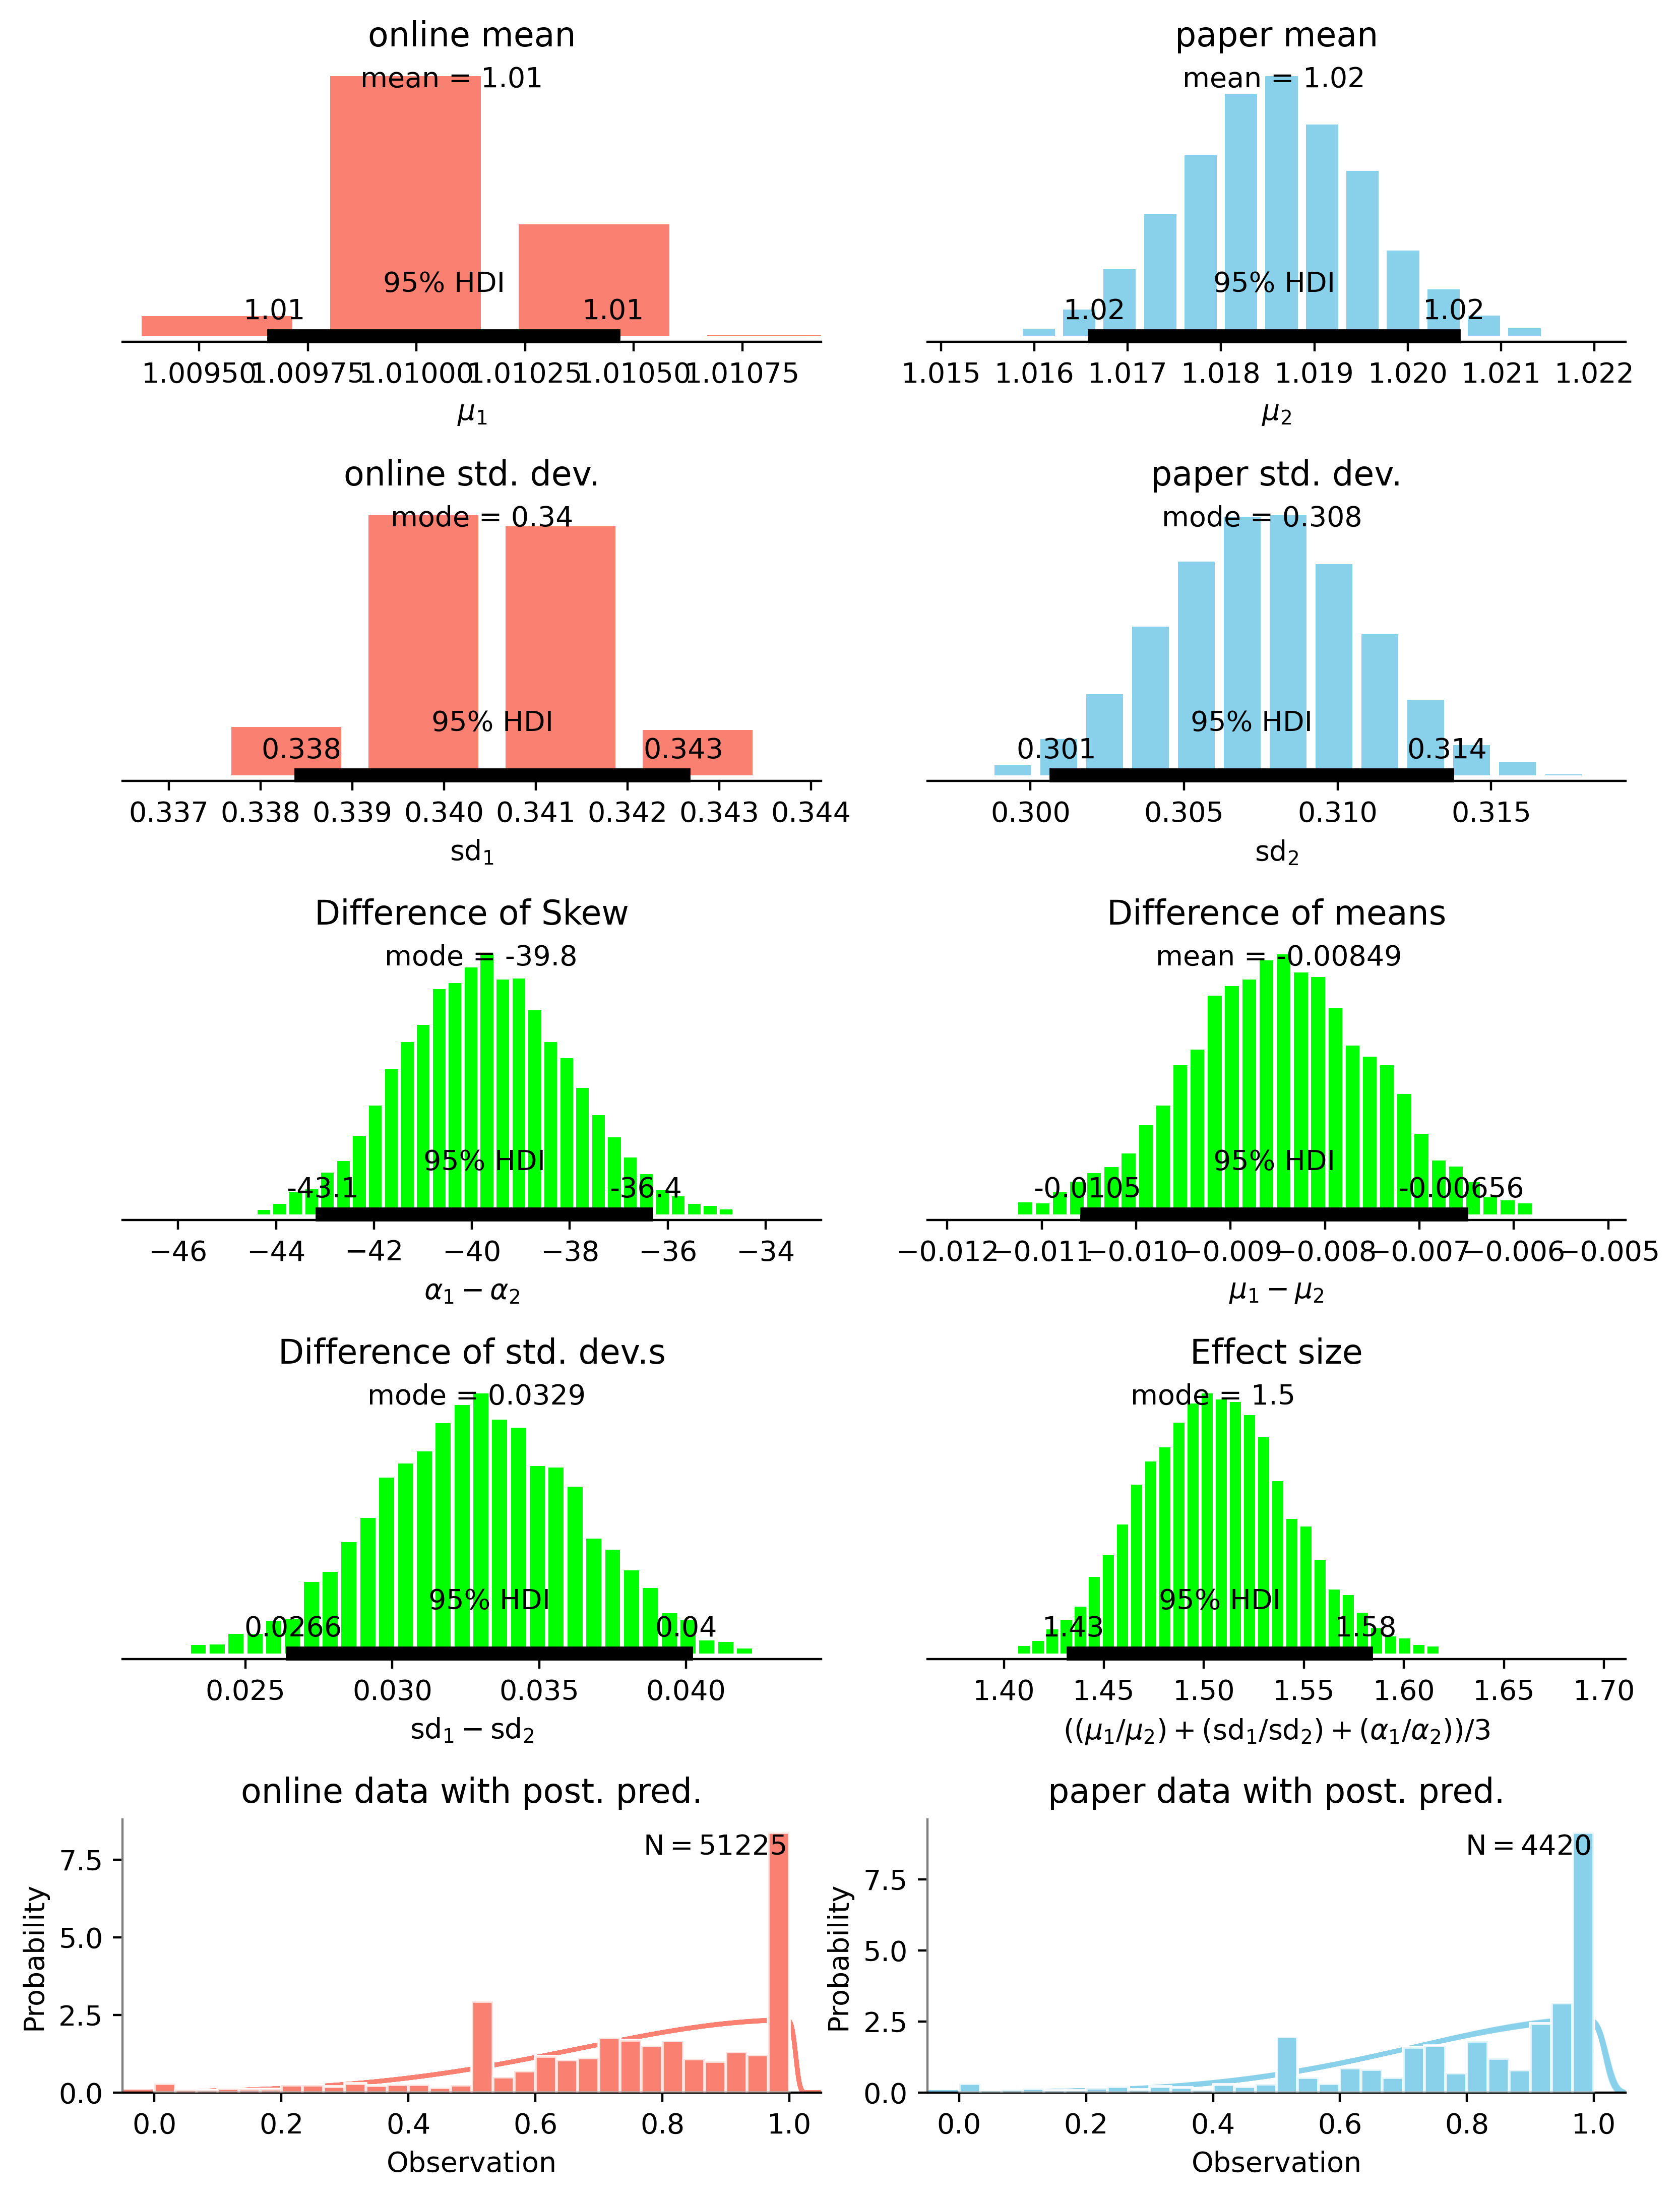

In [2]:
from bayes_test import BayesianHypothesisTestSkewNormal
import pandas as pd
import numpy as np

draws = 2000

online = np.load('online_distinctiveness.npy')
paper = np.load('paper_distinctiveness.npy')


df1 = pd.DataFrame({'value' : paper})
df2 = pd.DataFrame({'value' : online})
df1['del_type'] = 'paper'
df2['del_type'] = 'online'

df = pd.concat([df1,df2])

study_test = BayesianHypothesisTestSkewNormal(df=df,
                                   group1_name='online',
                                   group2_name='paper',
                                   value_column='value',
                                   category_column='del_type')
study_test.run_model(draws)
study_test.plot_results()

In [2]:
study_test.cliff_delta()
study_test.non_overlap_effect_size()
study_test.divergence_effect_size()
study_test.value_storage

Sampling: [Group 1 data, Group 2 data]


{'Group 1 mean': {'mean': 1.010078432851898,
  'hdi_min': 1.0096840137426724,
  'hdi_max': 1.010498974976711},
 'Group 2 mean': {'mean': 1.0185384473770582,
  'hdi_min': 1.0166405456471814,
  'hdi_max': 1.0203935152446943},
 'Group 1 SD': {'mode': 0.34030512492683546,
  'hdi_min': 0.3384791127758571,
  'hdi_max': 0.34270221754813157},
 'Group 2 SD': {'mode': 0.30711072092389435,
  'hdi_min': 0.3011702190032212,
  'hdi_max': 0.31410270254330835},
 'Difference of Skew': {'mode': -39.7611260067797,
  'hdi_min': -42.98431069709673,
  'hdi_max': -36.270224958556526},
 'Difference of means': {'mean': -0.008457739194071535,
  'hdi_min': -0.010317703428973202,
  'hdi_max': -0.006444348983012382},
 'Difference of SDs': {'mode': 0.03297809813300681,
  'hdi_min': 0.025897674699240758,
  'hdi_max': 0.03966065639816829},
 'Effect size': {'mode': 1.4964893902096337,
  'hdi_min': 1.437210670914154,
  'hdi_max': 1.583654389599981},
 'cliff_delta': {'cliff_delta': 0.5470620448},
 'non_overlap_effect_si